# Human Insights from Olympics - Elite Gymnastics

Each of the beautiful gymnasts vying for the spotlight, who succeeded and who exceeded expectations?

In [1]:
import pandas as pd
from datetime import datetime, timedelta
import re

import seaborn as sns
import matplotlib.pyplot as plt

import spacy
from spacy.tokens import Span
from spacy import displacy

## Consolidating data from sporteverywhere Youtube Community Page 

In [2]:
df=pd.DataFrame()
for index in range(0,20):
    minidf = pd.read_csv(f'communityPost{index}_expand.csv')
    df=df.append(minidf)

In [3]:
df.columns=['comment_rank','uuid','comment','author','relative_time_posted','post_url','ingestion_date']

In [4]:
df.relative_time_posted=df.relative_time_posted.apply(lambda x: x.replace(' (edited)',''))

In [5]:
def derive_post_date(i):
    num=int(re.findall(r'\d+',i)[0])
    ingestion_date=datetime.strptime('2021-08-10', '%Y-%m-%d').date()
    if 'minute' in i:
        d='2021-08-10'
    elif 'hour' in i and num<12:
        d='2021-08-10'
    elif 'hour' in i and num>=12:
        d=str(ingestion_date - timedelta(days=1))
    elif 'day' in i:
        d=str(ingestion_date - timedelta(days=num))
    elif 'week' in i:
        d=str(ingestion_date - timedelta(days=7*num))
    return d

In [6]:
tf=df.copy()

In [7]:
tf['post_date']=tf.relative_time_posted.apply(lambda x: derive_post_date(x))

In [8]:
tf.head()

,comment_rank,uuid,comment,author,relative_time_posted,post_url,ingestion_date,post_date
0,0,1e7c4600-5f6b-46fe-9bdd-64e88c4fd3aa,Which of the following skills would you like t...,sporteverywhere,19 hours ago,https://www.youtube.com/post/Ugws-LTpmCAo93tBV...,2021-08-10,2021-08-09
1,1,844341d6-4ff4-4112-be81-402cdd877599,"The Dos Santos II, when done properly, (like C...",Vladymir Dolia,19 hours ago,https://www.youtube.com/post/Ugws-LTpmCAo93tBV...,2021-08-10,2021-08-09
2,2,d47408d6-4d16-4cb6-b280-89a7bfbbe823,"I want to see Produnova done more, but it's ju...",Kelly Stout,17 hours ago,https://www.youtube.com/post/Ugws-LTpmCAo93tBV...,2021-08-10,2021-08-09
3,3,fa13a021-91cb-4a07-8f9e-34f275111f3b,"Dos Santos II. Ruedas and Rulfovas, they’ve be...",L T,18 hours ago,https://www.youtube.com/post/Ugws-LTpmCAo93tBV...,2021-08-10,2021-08-09
4,4,b2591449-cd71-499f-8cca-4030b74c8a30,I'd love to see harder front tumbling to fulfi...,Aleksandra Prawda,17 hours ago,https://www.youtube.com/post/Ugws-LTpmCAo93tBV...,2021-08-10,2021-08-09


## Data Overview

In [9]:
df.shape

(1928, 7)

In [10]:
tf.post_date.value_counts().reset_index().sort_values(by='index')

,index,post_date
9,2021-07-20,1
5,2021-07-27,66
0,2021-08-03,1114
2,2021-08-04,218
4,2021-08-05,76
3,2021-08-06,121
6,2021-08-07,54
7,2021-08-08,32
1,2021-08-09,223
8,2021-08-10,23


## Using Spacy to determine key persons and events entities

PERSON: Identifies people, including fictional

In [12]:
import en_core_web_sm
nlp = en_core_web_sm.load()

In [65]:
string = """Most Decorated Female Gymnasts of the Tokyo Games:

3 medals:
Sunisa Lee 🥇🥈🥉
Angelina Melnikova 🥇🥉🥉

2 medals:
Rebeca Andrade 🥇🥈
Simone Biles 🥈🥉"""

doc=nlp(string)
displacy.serve(doc, style="ent")

/Users/leongjiams/opt/anaconda3/lib/python3.8/site-packages/spacy/displacy/__init__.py:94: UserWarning: [W011] It looks like you're calling displacy.serve from within a Jupyter notebook or a similar environment. This likely means you're already running a local web server, so there's no need to make displaCy start another one. Instead, you should be able to replace displacy.serve with displacy.render to show the visualization.
  warnings.warn(Warnings.W011)



Using the 'ent' visualizer
Serving on http://0.0.0.0:5000 ...

Shutting down server on port 5000.


In [ ]:
doc=nlp(string)
displacy.serve(doc, style="ent")

In [13]:
def surface_entity(comments):
    keyword=[]
    keyword_label=[]
    
    for text in comments:
        doc = nlp(text)
        for ent in doc.ents:
            keyword.append(ent.text)
            keyword_label.append(ent.label_)

    key=pd.DataFrame({'keyword':keyword, 'keyword_label':keyword_label})
    return key

In [14]:
nounsdf=surface_entity(tf.comment)

In [15]:
nounsdf

,keyword,keyword_label
0,The Dos Santos II,PERSON
1,Chelsea Memmel,ORG
2,MAG,ORG
3,one,CARDINAL
4,Produnova,ORG
...,...,...
3256,5,CARDINAL
3257,BilesGoat,ORG
3258,5,CARDINAL
3259,1,CARDINAL


In [16]:
nounsdf.keyword_label.value_counts()

PERSON         1071
ORG             549
GPE             444
CARDINAL        309
DATE            277
NORP            195
ORDINAL         149
EVENT           123
PRODUCT          49
WORK_OF_ART      16
TIME             15
QUANTITY         14
PERCENT          13
FAC              13
LOC              12
MONEY             9
LAW               2
LANGUAGE          1
Name: keyword_label, dtype: int64

In [224]:
nounsdf[nounsdf['keyword_label']=='PERSON'].keyword.value_counts().head(5)
nounsdf[nounsdf['keyword_label']=='WORK_OF_ART'].keyword.value_counts().head(5)

Mykayla           4
MyKayla           2
Human Being       1
muh Twisties      1
the All-Around    1
Name: keyword, dtype: int64

In [192]:
nounsdf[nounsdf['keyword_label']=='NORP'].keyword.value_counts().head(5)

Chinese      15
Brazilian    15
American     13
Italian      11
Russian      11
Name: keyword, dtype: int64

# Using seaborn for Visualisations

Text(0.5, 1.0, 'SHARE OF VOICE')

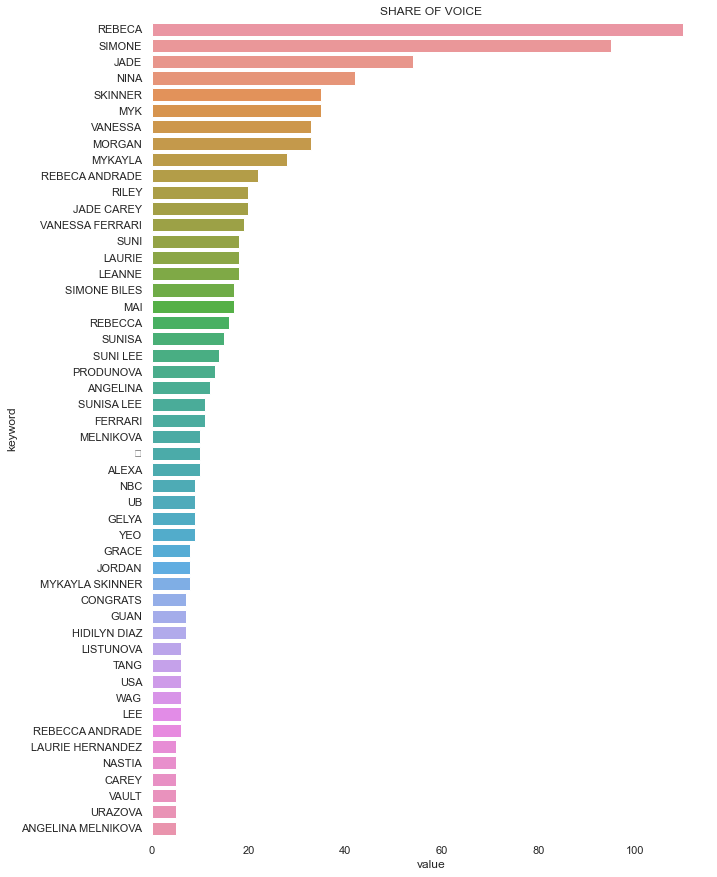

In [35]:
personsdf=nounsdf[(nounsdf['keyword_label']=='PERSON')|(nounsdf['keyword_label']=='ORG')|(nounsdf['keyword_label']=='FAC')].keyword.str.upper().value_counts().reset_index().rename(columns={'index':'keyword','keyword':'value'}).head(50)

sns.set(style="whitegrid")
plt.figure(figsize=(10,15))
sns.barplot( personsdf.value, personsdf.keyword,orient="h")
plt.grid(False)
sns.despine(left=True, bottom=True)
# plt.xticks(rotation=45)
plt.title('SHARE OF VOICE')

Text(0.5, 1.0, 'SHARE OF COUNTRY')

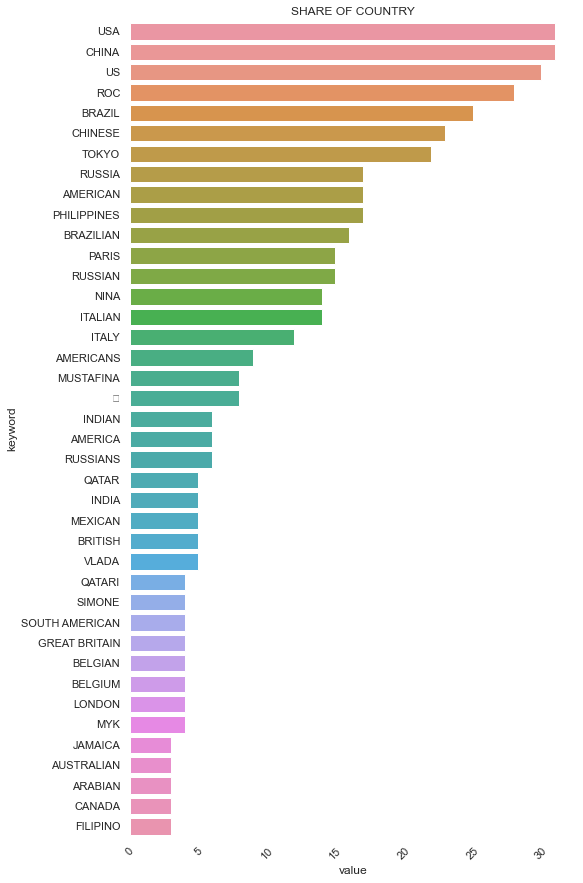

In [233]:
placementdf=nounsdf[(nounsdf['keyword_label']=='NORP')|(nounsdf['keyword_label']=='GPE')].keyword.str.upper().value_counts().reset_index().rename(columns={'index':'keyword','keyword':'value'}).head(40)

sns.set(style="whitegrid")
plt.figure(figsize=(8,15))
sns.barplot( placementdf.value, placementdf.keyword, orient="h")
plt.grid(False)
sns.despine(left=True, bottom=True)
plt.xticks(rotation=45)
plt.title('SHARE OF COUNTRY')

Text(0.5, 1.0, 'SHARE OF PLACEMENT')

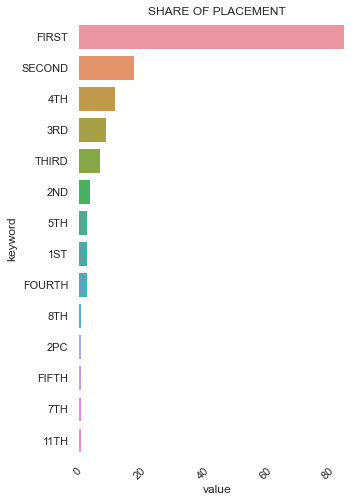

In [235]:
placementdf=nounsdf[(nounsdf['keyword_label']=='ORDINAL')].keyword.str.upper().value_counts().reset_index().rename(columns={'index':'keyword','keyword':'value'}).head(40)

sns.set(style="whitegrid")
plt.figure(figsize=(5,8))
sns.barplot( placementdf.value, placementdf.keyword, orient="h")
plt.grid(False)
sns.despine(left=True, bottom=True)
plt.xticks(rotation=45)
plt.title('SHARE OF PLACEMENT')

# Consolidating athlete's entities for Share of Voice

In [58]:
#Greatest of All Time1
lt=[i for i in nounsdf['keyword'] if ('simone' in i.lower())|('biles' in i.lower())] #142
len(lt)

142

In [59]:
#Right Place Right Time
lt=[i for i in nounsdf['keyword'] if ('suni' in i.lower())|('lee' in i.lower())] #82
lt=[i for i in nounsdf['keyword'] if ('jade' in i.lower())|('carey' in i.lower())] #107
lt=[i for i in nounsdf['keyword'] if ('myk' in i.lower())|('skinner' in i.lower())] #142
len(lt)

142

In [64]:
# Against all odds
lt=[i for i in nounsdf['keyword'] if ('rebeca' in i.lower())|('andrade' in i.lower())] #156
lt=[i for i in nounsdf['keyword'] if ('vanessa' in i.lower())|('ferrari' in i.lower())] #73
lt=[i for i in nounsdf['keyword'] if ('nina' in i.lower())|('derwael' in i.lower())] #72
len(lt)

156